In [40]:
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize_scalar

In [3]:
# csv file name
f = ["Set1.csv","Set2.csv"]

In [4]:
data = []
for i in range(len(f)):
    with open(f[i], newline='') as file:
        rows = csv.reader(file)
        #Ignore header
        headers = next(rows, None)
        temp_data = []
        for row in rows:
            temp_data.append(float(row[0]))
        data.append(np.array(temp_data))
print(len(data[0]),len(data[1]))

100 30


# MLE of Normal Distribution
Fit data by $N(\mu,\sigma^2)$, pdf $f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$  
Theoretical derivation:
$$L(\mu,\sigma^2|data) = \Pi^n_{i=1}f(x_i|\mu,\sigma^2)$$  
$$=\Pi^n_{i=1}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}$$ $$=(\frac{1}{\sqrt{2\pi\sigma^2}})^ne^{-\frac{\sum^n_{i=1}(x_i-\mu)^2}{2\sigma^2}}$$  
$$(\hat{\mu}_{MLE},\hat{\sigma^2}_{MLE}) = \arg L(\mu,\sigma^2|data)=\arg \ln L(\mu,\sigma^2|data)$$  
$$l = \ln L(\mu,\sigma^2|data) = -\frac{n}{2}\ln(2\pi\sigma^2)-\frac{\sum^n_{i=1}(x_i-\mu)^2}{2\sigma^2}$$  
$$\begin{cases} \frac{\partial l}{\partial\mu}=\frac{2\sum^n_{i=1}(x_i-\mu)}{2\sigma^2} = \frac{\sum^n_{i=1}(x_i-\mu)}{\sigma^2}\overset{Letting}{=} 0 \rightarrow(1)\\ \frac{\partial l}{\partial\sigma^2}=-\frac{n\times 2\pi}{2\times 2\pi\sigma^2}+\frac{\sum^n_{i=1}(x_i-\mu)^2}{2\sigma^4}=\frac{-n\sigma^2+\sum^n_{i=1}(x_i-\mu)^2}{2\sigma^4} \overset{Letting}{=} 0\rightarrow(2)\end{cases}$$  
$$From\space (1), {\sum^n_{i=1}(x_i-\hat{\mu}_{MLE})}=0$$
$$\sum^n_{i=1}(x_i)-n*\hat{\mu}_{MLE}=0$$  
$$\therefore\hat{\mu}_{MLE} = \frac{\sum^n_{i=1}(x_i)}{n} = \bar{x}$$  
$$From\space (2), -n\hat{\sigma}_{MLE}^2+\sum^n_{i=1}(x_i-\bar{x})^2 = 0$$  
$$\therefore\hat{\sigma}_{MLE}^2 = \frac{\sum^n_{i=1}(x_i-\bar{x})^2}{n}$$  


In [5]:
def MLE_normal(data):
    mu = np.mean(data)
    sigma_square = np.var(data)
    return mu,sigma_square

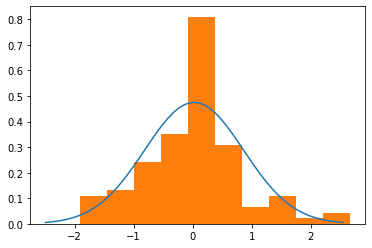

In [9]:
mu,sigma_square = MLE_normal(data[0])
sigma = math.sqrt(sigma_square)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
plt.hist(data[0],density = True)
plt.show()

# MLE of Exponential Distribution
Fit data by $exp(\lambda)$,pdf $f(x)=\lambda e^{-\lambda x}$

By Theoretical derivation:
$$L(\lambda|data) = \Pi^n_{j=1}f(x|\lambda)=\Pi^n_{j=1}\lambda e^{-\lambda x_j}$$
$$=\lambda^ne^{-\lambda\sum^n_{j=1}x_j}$$
$$l = \ln L = n\ln{\lambda}-\lambda\sum^n_{j=1}x_j$$
$$\frac{\partial l}{\partial \lambda} = \frac{n}{\lambda} - \sum^n_{j=1}x_j \overset{Letting}{=} 0$$
$$\therefore\hat{\lambda}_{MLE} = \frac{n}{\sum^n_{j=1}x_j} = \frac{1}{\bar{x}}$$

In [10]:
def MLE_exp(data):
    mu = np.mean(data)
    Lambda = 1/mu
    return Lambda

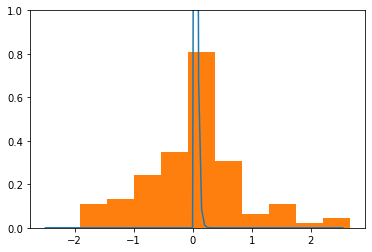

In [11]:
Lambda = MLE_exp(data[0])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.expon.pdf(x, scale = 1/Lambda))
plt.hist(data[0],density = True)
plt.ylim(top=1)
plt.show()

# MLE of Laplace Distribution
Fit data by $Laplace(\mu,b)$, pdf $f(x) = \frac{1}{2b}e^{-\frac{|x-\mu|}{b}}$

Theoretical derivation:
$$L(\mu,b|data) = \Pi^n_{i=1}f(x|\mu,b) = \Pi^n_{i=1}\frac{1}{2b}e^{-\frac{|x_i-\mu|}{b}}$$
$$=\frac{1}{(2b)^n}e^{\sum^n_{i=1}-\frac{|x_i-\mu|}{b}}$$
$$l = \ln L = -n\ln{2b}-\sum^n_{i=1}\frac{|x_i-\mu|}{b}=-n\ln{2b}-\frac{1}{b}\sum^n_{i=1}|x_i-\mu|$$
$$\begin{cases}\frac{\partial l}{\partial \mu} = \frac{n}{b}\sum^n_{i=1}\frac{x_i-\mu}{|x_i-\mu|}\overset{Letting}{=}0\rightarrow (1)\\\frac{\partial l}{\partial b} =-\frac{2n}{2b}+\frac{1}{b^2}\sum^n_{i=1}|x_i-\mu|=\frac{n}{b}(-1+\frac{\sum^n_{i=1}|x_i-\mu|}{nb}）\overset{Letting}{=}0\rightarrow (2)\end{cases}$$
$$From\space (1), \sum^n_{i=1}\frac{x_i-\hat{\mu}_{MLE}}{|x_i-\hat{\mu}_{MLE}|}=0$$
$$\sum^n_{i=1}sgn(x_i-\hat{\mu}_{MLE}) = 0$$
**Case 1: n is odd**
$$when\space \mu = median(data), \sum^n_{i=1}sgn(x_i-\mu) = sgn(median(data)-\mu) \rightarrow 0$$
**Case 2: n is even**
$$when\space \mu=median(data)=\frac{x_{\frac{n}{2}}+x_{\frac{n+1}{2}}}{2},\sum^n_{i=1}sgn(x_i-\mu)=sgn(x_{\frac{n}{2}}-\mu) + sgn(x_{\frac{n+1}{2}}-\mu) = 0$$
$$\therefore\hat{\mu}_{MLE} = median(data) $$
$$From\space (2),\frac{\sum^n_{i=1}|x_i-\mu|}{n\hat{b}_{MLE}}=1$$
$$\therefore \hat{b}_{MLE} = \frac{1}{n}\sum^n_{i=1}|x_i-\mu|$$
$$\therefore\begin{cases}\hat{\mu}_{MLE} = median(data)\\\hat{b}_{MLE} = \frac{1}{n}\sum^n_{i=1}|x_i-\mu|\end{cases}$$

Check convexity:
$$\frac{\partial^2l}{d\mu^2} = \frac{n}{b}\sum^n_{i=1}\frac{-|x_i-\mu|+(x_i-\mu)\frac{(x_i-\mu)}{|x_i-\mu|}}{(x_i-\mu)^2}=\frac{n}{b}\sum^n_{i=1}\frac{\frac{-(x_i-\mu)^2+(x_i-\mu)^2}{|x_i-\mu|}}{(x_i-\mu)^2}=0$$
$$\therefore\space l\space is\space convex$$

In [16]:
def MLE_lap(data):
    mu = np.median(data)
    b = 0
    for x in data:
        b+=abs(x-mu)
    b /= len(data)
    return mu,b

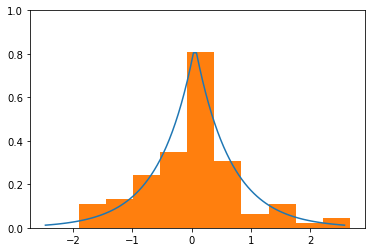

In [17]:
mu,b = MLE_lap(data[0])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.laplace.pdf(x, loc = mu, scale = b))
plt.hist(data[0],density = True)
plt.ylim(top=1)
plt.show()

# MLE of Gamma Distribution
Fit data by $Gamma(\alpha,\lambda)$, pdf $f(x) = \frac{x^{\alpha-1}\lambda^\alpha}{\Gamma(\alpha)}e^{-\lambda x},x>0$  
Theoretical derivation:
$$L(\alpha,\lambda|data) = \Pi^n_{i=1}f(x_i|\alpha,\lambda) = \Pi^n_{i=1}\frac{x_i^{{\alpha-1}}\lambda^\alpha}{\Gamma(\alpha)}e^{-\lambda x_i}$$
$$=(\frac{\lambda^\alpha}{\Gamma(\alpha)})^n\Pi^n_{i=1}(x_i^{\alpha-1})e^{-\lambda x_i}$$
$$l = \ln L = n\alpha\ln{\lambda}-n\ln{\Gamma(\alpha)}+(\alpha-1)(\sum^n_{i=1}\ln{x_i})-\lambda\sum^n_{i=1} x_i$$
$$\begin{cases}\frac{\partial l}{\partial \alpha} = n\ln{\lambda}-\frac{n\Gamma'(\alpha)}{\Gamma(\alpha)}+\sum^n_{i=1}\ln{x_i}\overset{Letting}{=} 0\rightarrow (1)\\\frac{\partial l}{\partial \lambda} = \frac{n\alpha}{\lambda}-\sum^n_{i=1}x_i\overset{Letting}{=}0\rightarrow (2)\end{cases}$$
$$From\space (2),\frac{n\alpha}{\hat{\lambda}_{MLE}} = \sum^n_{i=1}x_i$$
$$\therefore \hat{\lambda}_{MLE} = \frac{n\hat{\alpha}_{MLE}}{\sum^n_{i=1}x_i}=\frac{\hat{\alpha}_{MLE}}{\bar{x}}$$

$\hat{\alpha}_{MLE}$ need to be solve by numerical calculation.  
$\therefore$  Find maximum of $$l =  n\alpha\ln{\lambda}-n\ln{\Gamma(\alpha)}+(\alpha-1)(\sum^n_{i=1}\ln{x_i})-\lambda\sum^n_{i=1} x_i\newline= n\hat{\alpha}_{MLE}\ln{\frac{\hat{\alpha}_{MLE}}{\bar{x}}}-n\ln{\Gamma(\hat{\alpha}_{MLE})}+(\hat{\alpha}_{MLE}-1)(\sum^n_{i=1}\ln{x_i})-\frac{\hat{\alpha}_{MLE}}{\bar{x}}\sum^n_{i=1} x_i$$
$$= n\hat{\alpha}_{MLE}(\ln{\hat{\alpha}_{MLE}}-\ln{\bar{x}})-n\ln{\Gamma(\hat{\alpha}_{MLE})}+(\hat{\alpha}_{MLE}-1)(\sum^n_{i=1}\ln{x_i})-\frac{\hat{\alpha}_{MLE}}{\bar{x}}\sum^n_{i=1} x_i$$

In [252]:
def MLE_gamma(data):
    # Method 1: Handling data with negative value by replacing with a very small number
    '''
    n = len(data)
    k = 1e-3 # A very small number for handling negative value
    d = data[data>0] # Remove negative value
    d = np.concatenate((d,k*np.ones((n-len(d)))))
    '''
    #Method 2 handling data by shift the location
    if len(data[data>0]) < len(data):
        n = len(data)
        k = 1e-3 # A very small number for handling negative value
        d = data + abs(np.min(data)) + k
    else:
        d = data
    l = lambda a: -log_MLE_gamma(a,d)
    res = minimize_scalar(l,bounds = (0.001,20), method='bounded')
    a = res.x
    Lambda = a/np.mean(d)
    return a,Lambda

In [253]:
def log_MLE_gamma(a,d):
    n = len(d)
    '''
    k = 1e-3 # A very small number for handling negative value
    d = data[data>0] # Remove negative value
    d = np.concatenate((d,k*np.ones((n-len(d)))))
    '''
    mu = np.mean(d)
    lnx_sum = np.sum(np.log(d))
    f = n*a*(np.log(a)-np.log(mu))-n*np.log(math.gamma(a))+(a-1)*(lnx_sum)-a*np.sum(x)/mu
    return f
    

In [254]:
MLE_gamma(data[1])

(19.999993356584234, 1.0391382962532034)

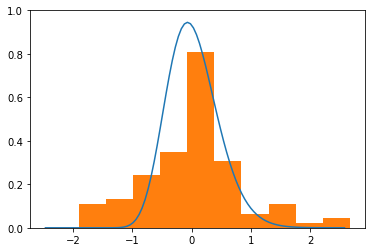

In [255]:
a,Lambda = MLE_gamma(data[0])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.gamma.pdf(x, a,loc = -abs(np.min(data[0]))-1e-3, scale = 1/Lambda))
plt.hist(data[0],density = True)
plt.ylim(top=1)
plt.show()

In [265]:
def plot_all(data):
    plt.figure(figsize=(10,10))
    
    mu,sigma_square = MLE_normal(data)
    sigma = math.sqrt(sigma_square)
    app_mu,app_ss = round(mu,2),round(sigma_square,2) 
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma),label=f'N({app_mu},{app_ss})')
    
    Lambda = MLE_exp(data)
    app_lam = round(1/Lambda,2)
    plt.plot(x, scipy.stats.expon.pdf(x, scale = 1/Lambda),label = f'Exp({app_lam})')
    
    mu,b = MLE_lap(data)
    app_mu,app_b = round(mu,2),round(b,2) 
    plt.plot(x, scipy.stats.laplace.pdf(x, loc = mu, scale = b),label = f'L({app_mu},{app_b})')
    
    a,Lambda = MLE_gamma(data)
    if len(data[data>0]) < len(data):
        loc = -abs(np.min(data))-1e-3
    else:
        loc = 0
    app_a,app_lam,app_loc = round(a,2),round(Lambda,2),round(loc,2) 
    plt.plot(x, scipy.stats.gamma.pdf(x, a,loc = loc, scale = 1/Lambda),label = f'Gamma({app_a},{app_lam}),shift = {app_loc}')
    
    a= plt.hist(data,density = True)
    plt.ylim(top=max(a[0])*1.5)
    plt.legend()
    plt.show()

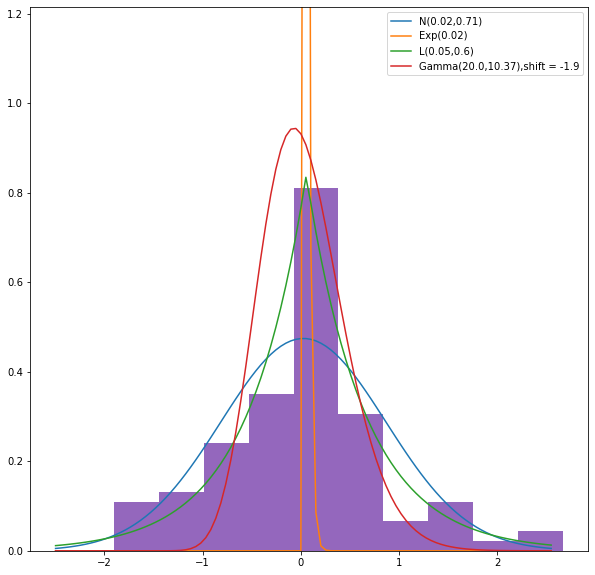

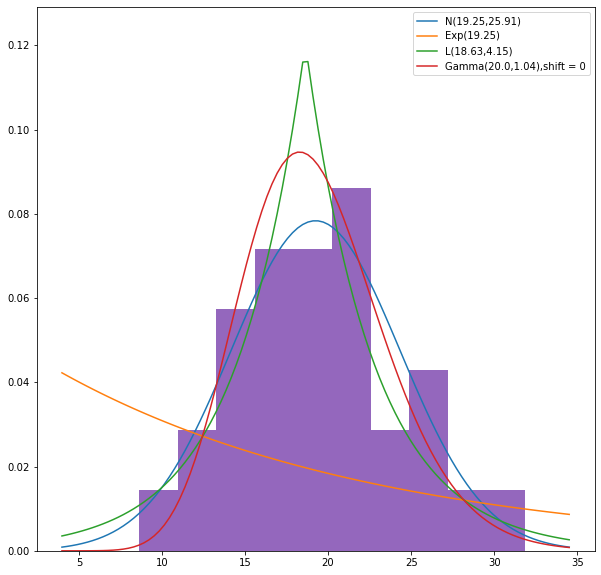

In [266]:
for i in range(len(data)):
    plot_all(data[i])

In [276]:
def plot_all_fit(data):
    plt.figure(figsize=(10,10))
    
    mu,sigma =scipy.stats.norm.fit(data)
    app_mu,app_ss = round(mu,2),round(sigma_square,2) 
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma),label=f'N({app_mu},{app_ss})')
    
    loc,scale = scipy.stats.expon.fit(data)
    app_lam = round(1/scale,2)
    plt.plot(x, scipy.stats.expon.pdf(x,loc = loc ,scale = scale),label = f'Exp({app_lam})')
    
    loc,scale = scipy.stats.laplace.fit(data)
    app_mu,app_b = round(loc,2),round(scale,2) 
    plt.plot(x, scipy.stats.laplace.pdf(x, loc = loc, scale = scale),label = f'L({app_mu},{app_b})')
    
    a,loc,scale = scipy.stats.gamma.fit(data)
    app_a,app_loc,app_lam = round(a,2),round(loc,2),round(1/scale,2) 
    plt.plot(x, scipy.stats.gamma.pdf(x, a,loc = loc, scale = scale),label = f'Gamma({app_a},{app_lam}),shift = {app_loc}')
    
    a= plt.hist(data,density = True)
    plt.ylim(top=max(a[0])*1.5)
    plt.legend()
    plt.show()

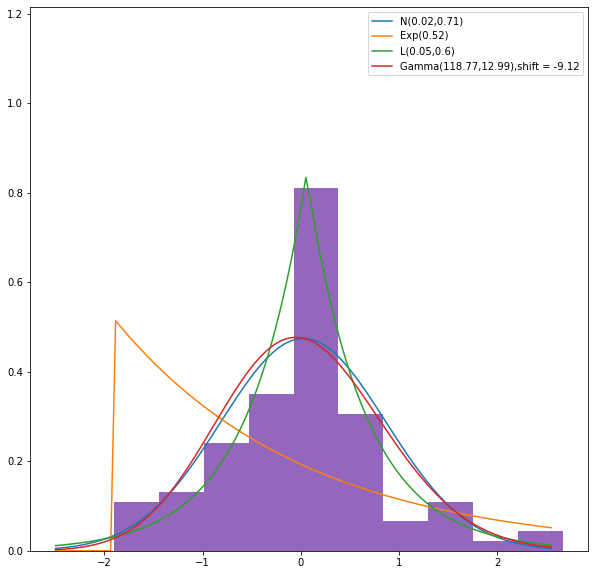

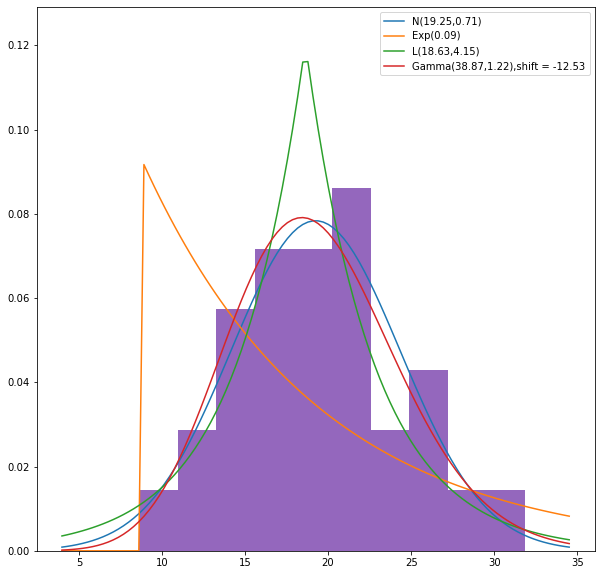

In [277]:
for i in range(len(data)):
    plot_all_fit(data[i])

In [273]:
scipy.stats.gamma.fit(data[0])

(38.87403230613281, -12.532133093562411, 0.8174825332358733)